# **Importing the Dependencies**

In [397]:
# Basic Libraries for Machine Learning
import numpy as np 
import pandas as pd

# For Date Visualization and EDA
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Importing sklearn library
import sklearn

# For Scaling the datasets
from sklearn.preprocessing import StandardScaler

# Clustering Techniques
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import normalized_mutual_info_score

# **Data processing**

In [398]:
# Loading the dataset to Pandas dataframe
df = pd.read_csv("data.csv", names=['x','y'])
joel = df.to_numpy()

In [399]:
# First 5 rows of the dataframe
df.head()

,x,y
0,-0.635700,0.472938
1,0.686418,-0.481948
2,0.882468,0.086016
3,1.566876,0.422147
4,-0.788983,0.743609


In [400]:
# Last 5 rows of the dataframe
df.tail()

,x,y
3995,0.399613,-0.298868
3996,1.317083,-0.012860
3997,0.510458,-0.232525
3998,0.944405,0.316614
3999,0.690487,-0.489712


In [401]:
# Total number of rows and columns
df.shape

(4000, 2)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       4000 non-null   float64
 1   y       4000 non-null   float64
dtypes: float64(2)
memory usage: 62.6 KB


# **Data Visualisation**

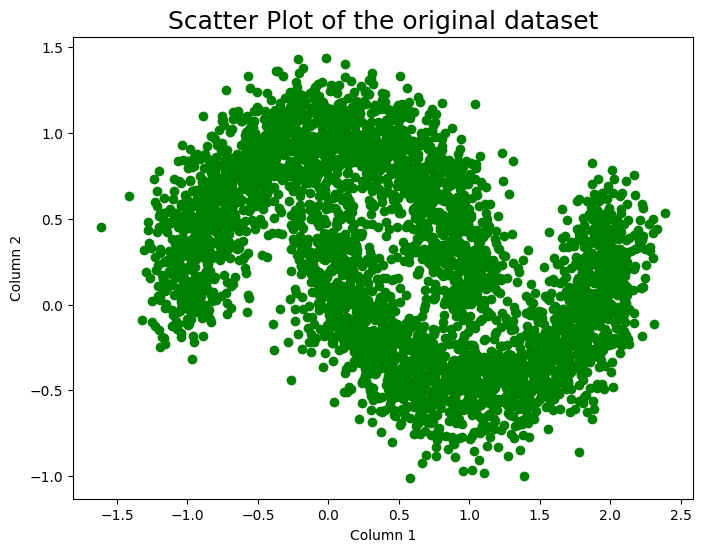

In [403]:
plt.figure(figsize=(8,6))
plt.scatter(df.x,df.y, color='green')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Scatter Plot of the original dataset', fontsize=18)
plt.show()

# Applying different clustering techniques and evaluate their performance#

**1.K-means**

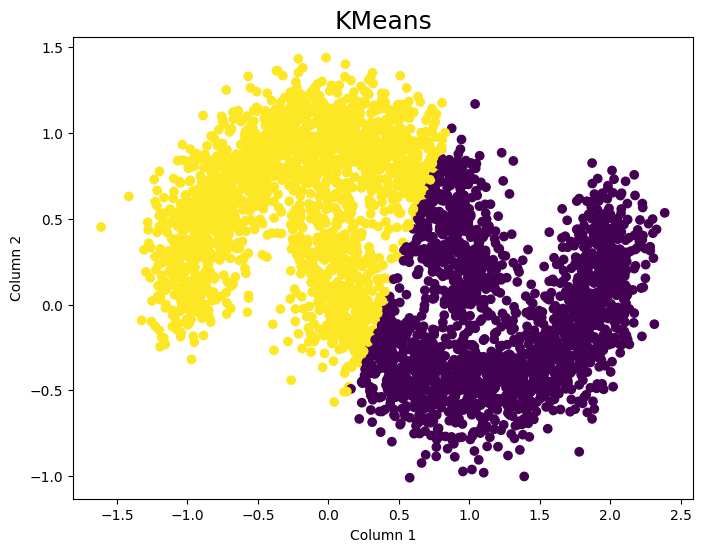

In [404]:
# K-means
km=cluster.KMeans(n_clusters=2, n_init=10)
km.fit(joel)
plt.figure(figsize=(8,6))
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title("KMeans", fontsize=18)
plt.scatter(joel[:,0],joel[:,1],c=km.labels_)
plt.show()

**2.Gaussian Mixture Model**

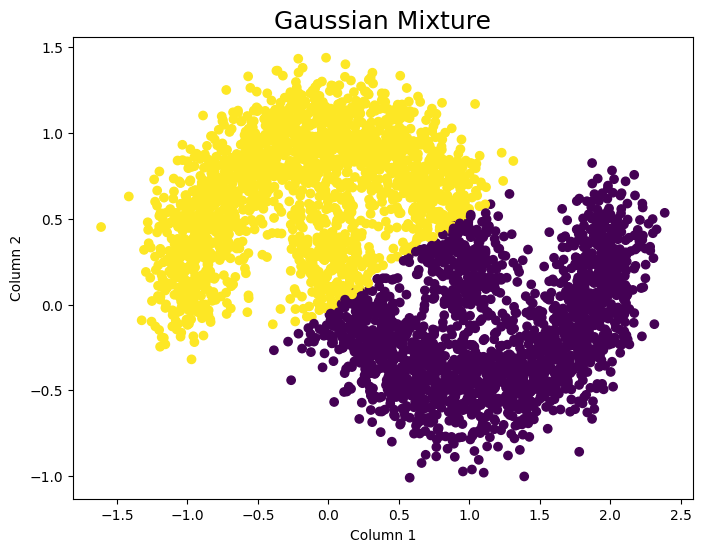

In [405]:
# Gaussian Mixture Model

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(joel)

plt.figure(figsize=(8,6))
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title("Gaussian Mixture", fontsize=18)

plt.scatter(joel[:,0],joel[:,1],c=gmm.predict(joel))
plt.show()

**3.DBSCAN**

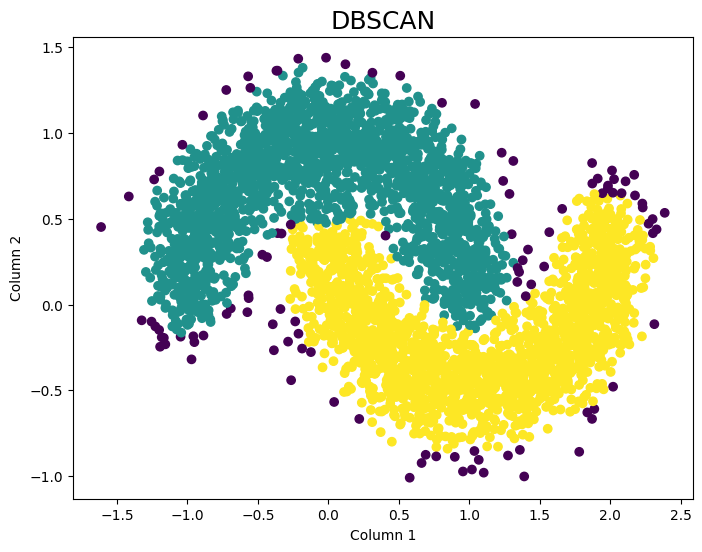

In [406]:
# DBSCAN

dbs = cluster.DBSCAN(eps=0.2003,min_samples=96)

dbs.fit(joel)
plt.figure(figsize=(8,6))
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title("DBSCAN", fontsize=18)
plt.scatter(joel[:,0],joel[:,1],c=dbs.labels_)
plt.show()
y_joel=dbs.fit_predict(joel)

**4.Spectral Clustering**

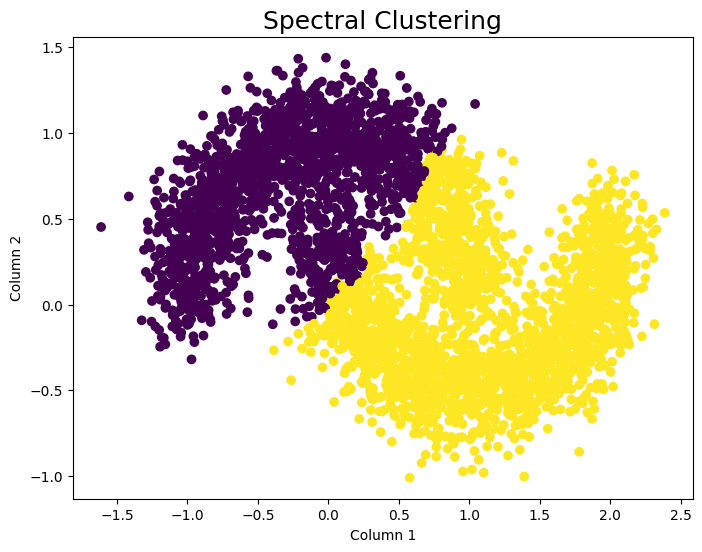

In [407]:
# Spectral Clustering

clustering = cluster.SpectralClustering(n_clusters=2, n_neighbors= 7,eigen_solver='arpack', affinity="nearest_neighbors").fit(joel)

labels = clustering.fit_predict(joel)
labels
plt.figure(figsize=(8,6))
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title("Spectral Clustering", fontsize=18)
plt.scatter(joel[:,0],joel[:,1],c=labels)
plt.show()

**5. Agglomerative Clustering**

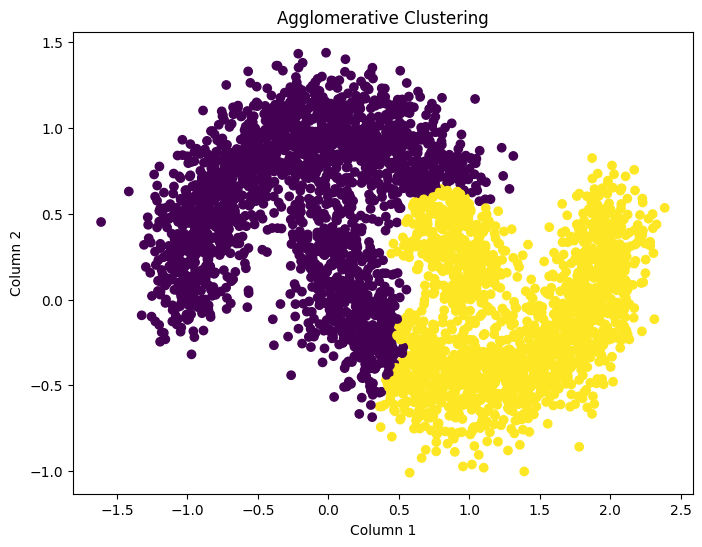

In [408]:
# Agglomerative Clustering

cluster_avg = AgglomerativeClustering(n_clusters=2, linkage='average')  
cluster_avg.fit_predict(joel)

plt.figure(figsize=(8,6))
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title("Agglomerative Clustering")
plt.scatter(joel[:,0],joel[:,1], c=cluster_avg.labels_)
plt.show()

After running all the clustering technique, we can see that DBSCAN provides us best cluster. So, we will use only DBSCAN technique to find the cluster labels.

In [409]:
# Add cluster labels to the DataFrame
df['cluster']=y_joel

print(df)
# Save the updated DataFrame to a new CSV file
df.to_csv('data_with_clusters.csv', index=False)

             x         y  cluster
0    -0.635700  0.472938        0
1     0.686418 -0.481948        1
2     0.882468  0.086016        0
3     1.566876  0.422147       -1
4    -0.788983  0.743609        0
...        ...       ...      ...
3995  0.399613 -0.298868        1
3996  1.317083 -0.012860        1
3997  0.510458 -0.232525        1
3998  0.944405  0.316614        0
3999  0.690487 -0.489712        1

[4000 rows x 3 columns]


In [410]:
import csv
with open('joel_debbarma.txt', mode='a', newline='') as f:
    writer = csv.writer(f)
    writer.writerows([[y_joel[i]] for i in range(len(y_joel))])